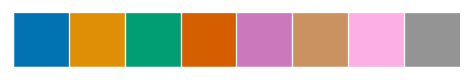

In [20]:
#Import stuff
%matplotlib inline
import base64
from collections import namedtuple, OrderedDict
from datetime import datetime
from itertools import product
import glob
import io
import os
import pickle
import sys
os.environ['PROJ_LIB']=os.path.join(os.environ['HOME'],'.anaconda3','share','proj')

from astropy.stats import LombScargle
import astropy.units as u
from brewer2mpl import qualitative
import cufflinks as cf
#cf.set_config_file(offlinedisipadamentedisipadamente=False, world_readable=True, theme='ggplot')
import h5py
from IPython.display import HTML
import json
import matplotlib as mpl
from matplotlib import animation, rc
from matplotlib.colors import LightSource
from matplotlib.colorbar import cm as colmap2
from matplotlib.patches import Polygon
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, cm as colmap
import mpld3
from netCDF4 import Dataset as nc, num2date, MFDataset as mc, date2num
import numpy as np
import palettable as colortable
from palettable.mycarta import LinearL_20, CubeYF_20
from palettable.colorbrewer.qualitative import Paired_12
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import pytz
import seaborn as sns
from scipy import signal
from scipy import interpolate
import tempfile
import xarray as xr

sns.set()
fontsize = 30
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : fontsize}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = [15.0,10.0]
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'
plt.style.use("seaborn-talk")

pal = sns.palplot(sns.color_palette("colorblind", 8))
sns.set_style("darkgrid", {'axes.grid':True, 'ticks':True})
sns.set_context('talk')
sns.set_palette(pal)
sns.despine()
np.warnings.filterwarnings('ignore')
utc = pytz.UTC
timezone = pytz.timezone('Australia/Darwin')
mpld3.disable_notebook()
#pal

In [21]:
#Define showcode button action
from IPython.display import HTML
showcode='''
<style>
.button {
    background-color: #e7e7e7;
    color: black; /* Green */
    border: none;
    padding: 5px;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    font-size: 10px;
    margin: 2px 2px;
    cursor: pointer;
}
.button5 {border-radius: 50%;}
</style>
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code" class="button button5"></form>

'''

In [22]:
import pandas as pd
import io
import base64

In [23]:
def embed_vid(outvid):
    video = io.open(outvid, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video alt="test" width="950" height="500" loop="true" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" loop="true" />
             </video>'''.format(encoded.decode('ascii')))

<section data-background="">
<div class="intro-body">
<div class="intro_h1"><h1>Extremes Events of Tropical Island Thunderstorms</h1></div>
<h3>Does a Resolution Increase Improve their Representaion?</h3>
<p><strong><span class="a">Martin Bergemann</span></strong> <span class="b"></span>Uni Melbourne<span></span>
</p>
<center><img src="HectorCloud.png" style="height:350px;" alt="Hector" height="200px"></center>
</div>
</section>

In [24]:
HTML(showcode)

* More destinct Extreme Events during Break-Periods

## Simulation of Hector Events (12/11 - 20/11/2006)

<figure>
    <center><img src="Topo.png" alt="Study area" style="height:400px;width:500px;"/></center>
<figcaption  style="text-align: right">Study Area</figcaption>
</figure>


* 80 Vertial Level 
* 8 Ensemble Member, each 6 hours different init times

f =  open('../slides/d3plot.dmp','rb')
p3plot = pickle.load(f)
f.close()
plot_data = pd.read_pickle('WOH_aavg.pkl')
import seaborn as sns
import mpld3

## Simulation of Hector Events (12/11 - 20/11/2006)

In [2]:
%%HTML
<figure>
<center><img src="Fig_005.png" alt="Study area" style='height:400px;'/></center>
<figcaption  style="text-align: right">Time Series of Area Avg. Rainfall</figcaption>
</figure>

In [28]:
%%HTML
<figure>
<video width="750" height="400" loop="true" controls>
  <source src='WeekOfHector-Ens-3.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Example UM 0.44km Simulation and CPOL</figcaption>
</figure>

<figure>
<img src="Fig_010.png" alt="Study area" style='height:450px;'/>
<figcaption  style="text-align: right">Maps of Rainfall</figcaption>
</figure>

### The simulated Diurnal Cycle

<figure>
<img src="Fig_012.png" alt="Study area" style='height:450px;'/>
<figcaption  style="text-align: right">Time of Rainfall Maximum and Area Avg Diurnal Cycle</figcaption>
</figure>

In [29]:
%%HTML
<figure>
<video width="750" height="400" loop="true" controls>
  <source src='WeekOfHector-Diurnal-2.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Diurnal Cycle</figcaption>
</figure>

## How well are Extremes Represented?


<figure>
<img src="Fig_013.png" alt="Study area" style='height: 450px;'/>
<figcaption  style="text-align: right">Occurrence of Extreme Events</figcaption>
</figure>

### In Summary:
 * Storms are a Little too early in the Model
 * Occure too Central over Melville Island
 * Extreme Events are Slighly Over Estimated
 * Slight Improvement with Higher Resolution Version

## Storm-Track Analysis
* Analyse Strom tracks using an adopted tracking verion of TINT (TINT is not TITAN)
* TINT -> Tracking with Phase-Correlation and "Hungarian" similarity mathiching

In [30]:
display(pd.read_pickle('medians.pkl').round(2))

,UM 1.33km,UM 0.44km,CPOL
Area,76.67,61.25,110.68
Duration,60.00,50.00,60.00
Avg-Rain,4.78,5.65,4.52
Max-Rain,6.90,8.56,6.79
Speed,10.03,12.71,12.67
# Storms,73.00,50.00,42.00


## Storm Intensities

<figure>
<img src="Fig_020.png" alt="Study area" style='height: 450px;'/>
<figcaption  style="text-align: right">Distribution of Storm Percentiles</figcaption>
</figure>

### The strongest Stormes (>9th decile)

In [31]:
%%HTML
<figure>
<img src="Fig_018.png" alt="Study area" style='width:700px;'/>
<figcaption  style="text-align: right">Tracks of most intense storms</figcaption>
</figure>

### Storm Properties by Intensity

In [32]:
cycles = pd.read_pickle('storm_cycle.pkl')

In [33]:
%%HTML
<figure>
<img src="Cycle.png" alt="Study area" style='height:600px;'/>
<figcaption  style="text-align: right">Rainfall Cycles</figcaption>
</figure>

<figure>
<img src="Fig_019.png" alt="Study area"  style="height:600px;"/>
<figcaption  style="text-align: right">Comparison Storm Properties by Rainfall Quintiles</figcaption>
</figure>

### Why are Storms more intense in the Sub-km version?

 * Investigation of Cold-Pools


In [34]:
%%HTML
<figure>
<video width="500" loop="true" controls>
  <source src='ColdPool-Ens-1.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Tracking with Density Potential Temperature Field Pertubation</figcaption>
</figure>

<figure>
<img src="Fig_038.png" alt="Study area" style="height:600px;"/>
<figcaption  style="text-align: right">Comparison Cold-Pool Properties and Mass Flux by Rainfall Quintiles</figcaption>
</figure>

In [35]:
fluxes = {}
lookup = {'UM133': 'UM 1.33km', 'UM044': 'UM 0.44km'}
import h5py
with h5py.File('fluxes.hdf5','r') as h5:
    P = h5['P'][:]
    for key, flx in lookup.items():
        fluxes[flx] = {}
        for var in h5[key].keys():
            fluxes[flx][var] = {}
            for quant in h5[key][var].keys():
                fluxes[flx][var][int(quant)] = h5[key][var][quant][:]             

In [36]:
def split(n, wspace=0.005):
    linspace = np.linspace(0, 1, n+1)
    out = []
    for d in range(n):
        out.append((linspace[d]+wspace/2, linspace[d+1]-wspace/2))
    return out 

* The State of the Atmosphere

In [4]:
%%HTML
<figure>
<img src="Fig_027.png" alt="Study area" style='height:500px;'/>
<figcaption  style="text-align: right">Comparison of vert. velo. and moist. flux</figcaption>
</figure>

* The State of the Atmosphere

In [5]:
%%HTML
<figure>
<img src="Fig_028.png" alt="Study area" style='height:500px;'/>
<figcaption  style="text-align: right">Comparison of Cloudwater before and during storm</figcaption>
</figure>

In [39]:
pbl_types = pd.read_pickle('pbl_types.pkl')
pbl_types.head()

,type,quant,fraction,run,precip,ustar,pbl_h
0,1,5,6.726190,UM 1.33km,6.13328,0.45187,629.894409
1,2,5,0.000000,UM 1.33km,6.13328,0.45187,629.894409
2,3,5,70.535714,UM 1.33km,6.13328,0.45187,629.894409
3,4,5,0.416667,UM 1.33km,6.13328,0.45187,629.894409
4,5,5,0.000000,UM 1.33km,6.13328,0.45187,629.894409


* Also somthing in the Boundary Layer

In [6]:
%%HTML
<figure>
<img src="Fig_040.png" alt="Study area" style='height:500px;'/>
<figcaption  style="text-align: right">Boundary Layer Properties</figcaption>
</figure>

In [41]:
%%HTML
<figure>
<video width="750" height="350" loop="true" controls>
  <source src='ColdPool_nativ_2.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Cold-Pool (center) and Rainfall (outer) for two ensemble member</figcaption>
</figure>
<img src="Diagram1.png" alt="Study area" style="height:150px;"/>
<p>One possible problem: Micro-Phys. depends on RH<sub>crit</sub> that is chosen on 80!! levels</p>